In [1]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly_express as px

/Users/keyu/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
data_in = './data_in'
data_out = './data_out'
data_prefix = 'novels'

In [3]:
#OHCO = ['book', 'chapter', 'para_num', 'sent_num', 'token_num']
#PARA = OHCO[:4] # Paragraphs
#SENT = OHCO[:5] # Sentences
#BAG = PARA


OHCO = ['president', 'speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2] # Speeches
BOOKS = OHCO[:1] # Presidents


BAG = CHAPS
# BAG = SENT

In [4]:
# word2vec parameters
w2v_params = dict(
    window = 5,
    vector_size = 246,
    min_count = 50,
    workers = 4
)

In [5]:
TOKENS = pd.read_csv('TOKEN.csv')#.set_index(OHCO)
VOCAB = pd.read_csv('VOCAB.csv')
LIB = pd.read_csv('LIB.csv')

In [6]:
TOKENS= TOKENS.set_index(OHCO)
LIB = LIB.set_index('president')

In [7]:
LIB

Unnamed: 0            speech_id  \
president                                     
hclinton             0  HClinton_2016_07_28   
hclinton             1  HClinton_2016_07_29   
hclinton             2  HClinton_2016_08_01   
hclinton             3  HClinton_2016_08_05   
hclinton             4  HClinton_2016_08_10   
...                ...                  ...   
wilson - D        1075  wilson_speeches_027   
wilson - D        1076  wilson_speeches_028   
wilson - D        1077  wilson_speeches_029   
wilson - D        1078  wilson_speeches_030   
wilson - D        1079  wilson_speeches_031   

                                                 speech_title  \
president                                                       
hclinton    Hillary Clinton delivers remarks at the 2016 D...   
hclinton    Democratic presidential candidate Hillary Clin...   
hclinton    Hillary Clinton (D), Presidential Candidate, R...   
hclinton    Hillary Clinton delivers remarks at the Nation...   
hclinton    Hillary Clinton holds a campaign rally in Des ...   
...                                                       ...   
wilson - D                     Wilson&#8217;s Fourteen Points   
wilson - D                               Sixth Annual Message   
wilson - D                               Fifth Annual Message   
wilson - D                             Seventh Annual Message   
wilson - D                              Eighth Annual Message   

                                                     src_file  
president                                                      
hclinton    ./Total_Corpus of Presidential Speeches/HClint...  
hclinton    ./Total_Corpus of Presidential Speeches/HClint...  
hclinton    ./Total_Corpus of Presidential Speeches/HClint...  
hclinton    ./Total_Corpus of Presidential Speeches/HClint...  
hclinton    ./Total_Corpus of Presidential Speeches/HClint...  
...                                                       ...  
wilson - D  ./Total_Corpus of Presidential Speeches/wilson...  
wilson - D  ./Total_Corpus of Presidential Speeches/wilson...  
wilson - D  ./Total_Corpus of Presidential Speeches/wilson...  
wilson - D  ./Total_Corpus of Presidential Speeches/wilson...  
wilson - D  ./Total_Corpus of Presidential Speeches/wilson...  

[1080 rows x 4 columns]

In [8]:
TOKENS

pos_tuple  \
president speech_id           para_num sent_num token_num                         
hclinton  HClinton_2016_07_28 0        0        0          ('<CLINTON:>', 'JJ')   
                                                1              ('Thank', 'NNP')   
                                                2                ('you!', 'NN')   
                                       1        0              ('Thank', 'NNP')   
                                                1                ('you!', 'NN')   
...                                                                         ...   
wilson    wilson_speeches_031 18       1        28            ('whether', 'IN')   
                                                29                 ('in', 'IN')   
                                                30           ('America', 'NNP')   
                                                31                 ('or', 'CC')   
                                                32         ('elsewhere.', 'VB')   

                                                           pos   token_str  \
president speech_id           para_num sent_num token_num                    
hclinton  HClinton_2016_07_28 0        0        0           JJ  <CLINTON:>   
                                                1          NNP       Thank   
                                                2           NN        you!   
                                       1        0          NNP       Thank   
                                                1           NN        you!   
...                                                        ...         ...   
wilson    wilson_speeches_031 18       1        28          IN     whether   
                                                29          IN          in   
                                                30         NNP     America   
                                                31          CC          or   
                                                32          VB  elsewhere.   

                                                            term_str  
president speech_id           para_num sent_num token_num             
hclinton  HClinton_2016_07_28 0        0        0            clinton  
                                                1              thank  
                                                2                you  
                                       1        0              thank  
                                                1                you  
...                                                              ...  
wilson    wilson_speeches_031 18       1        28           whether  
                                                29                in  
                                                30           america  
                                                31                or  
                                                32         elsewhere  

[3311842 rows x 4 columns]

In [9]:
DOCS = TOKENS[~TOKENS.pos.str.match('NNPS?')]\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()
DOCS = [doc for doc in DOCS if len(doc) > 1] # Lose single word docs

In [10]:
LIB.loc['trump'].shape

(82, 4)

In [11]:
LIB = LIB.loc['trump']

In [12]:
TOKENS.loc['trump']

pos_tuple  pos  \
speech_id        para_num sent_num token_num                            
Trump_2016_07_22 0        0        0          ('<TRUMP:>', 'JJ')   JJ   
                                   1            ('Thank', 'NNP')  NNP   
                                   2              ('you', 'PRP')  PRP   
                                   3              ('very', 'RB')   RB   
                                   4             ('much.', 'VB')   VB   
...                                                          ...  ...   
Trump_2016_11_09 6        11       3                ('to', 'TO')   TO   
                                   4              ('Mike', 'VB')   VB   
                                   5           ('Pence.', 'NNP')  NNP   
                          12       0            ('Thank', 'NNP')  NNP   
                                   1              ('you.', 'NN')   NN   

                                             token_str term_str  
speech_id        para_num sent_num token_num                     
Trump_2016_07_22 0        0        0          <TRUMP:>    trump  
                                   1             Thank    thank  
                                   2               you      you  
                                   3              very     very  
                                   4             much.     much  
...                                                ...      ...  
Trump_2016_11_09 6        11       3                to       to  
                                   4              Mike     mike  
                                   5            Pence.    pence  
                          12       0             Thank    thank  
                                   1              you.      you  

[426970 rows x 4 columns]

In [13]:
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [14]:

#LIB2 = LIB[LIB['author'] == 'melville']
TRUMP = TOKENS.loc['trump']
#melville = TOKENS.loc[LIB2.index]

In [15]:
POS = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
LIB = TRUMP[TRUMP["pos"].isin(POS)]

In [16]:
OHCO = ['speech_id', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2] # Speeches
BOOKS = OHCO[:1] # Presidents


BAG = BOOKS

In [17]:
POS = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
LIB = TRUMP[TRUMP["pos"].isin(POS)]
DOCS = TRUMP\
    .groupby(BAG)\
    .term_str.apply(lambda  x:  x.tolist())\
    .reset_index()['term_str'].tolist()

In [18]:
DOCS = [doc for doc in DOCS if len(doc) > 1] 
model = word2vec.Word2Vec(DOCS, **w2v_params)

In [19]:
coords = pd.DataFrame(
    dict(
        vector = [model.wv.get_vector(w) for w in model.wv.key_to_index], 
        term_str = model.wv.index_to_key    # 
    )).set_index('term_str')

In [20]:
tsne_engine = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
tsne_model = tsne_engine.fit_transform(coords.vector.to_list())

In [21]:
coords['x'] = tsne_model[:,0]
coords['y'] = tsne_model[:,1]

In [22]:
if coords.shape[1] == 3:
    coords = coords.merge(VOCAB.reset_index(), on='term_str')
    coords = coords.set_index('term_str')

In [23]:
coords = coords[coords.stop == 0]


In [24]:
coords = coords.dropna()

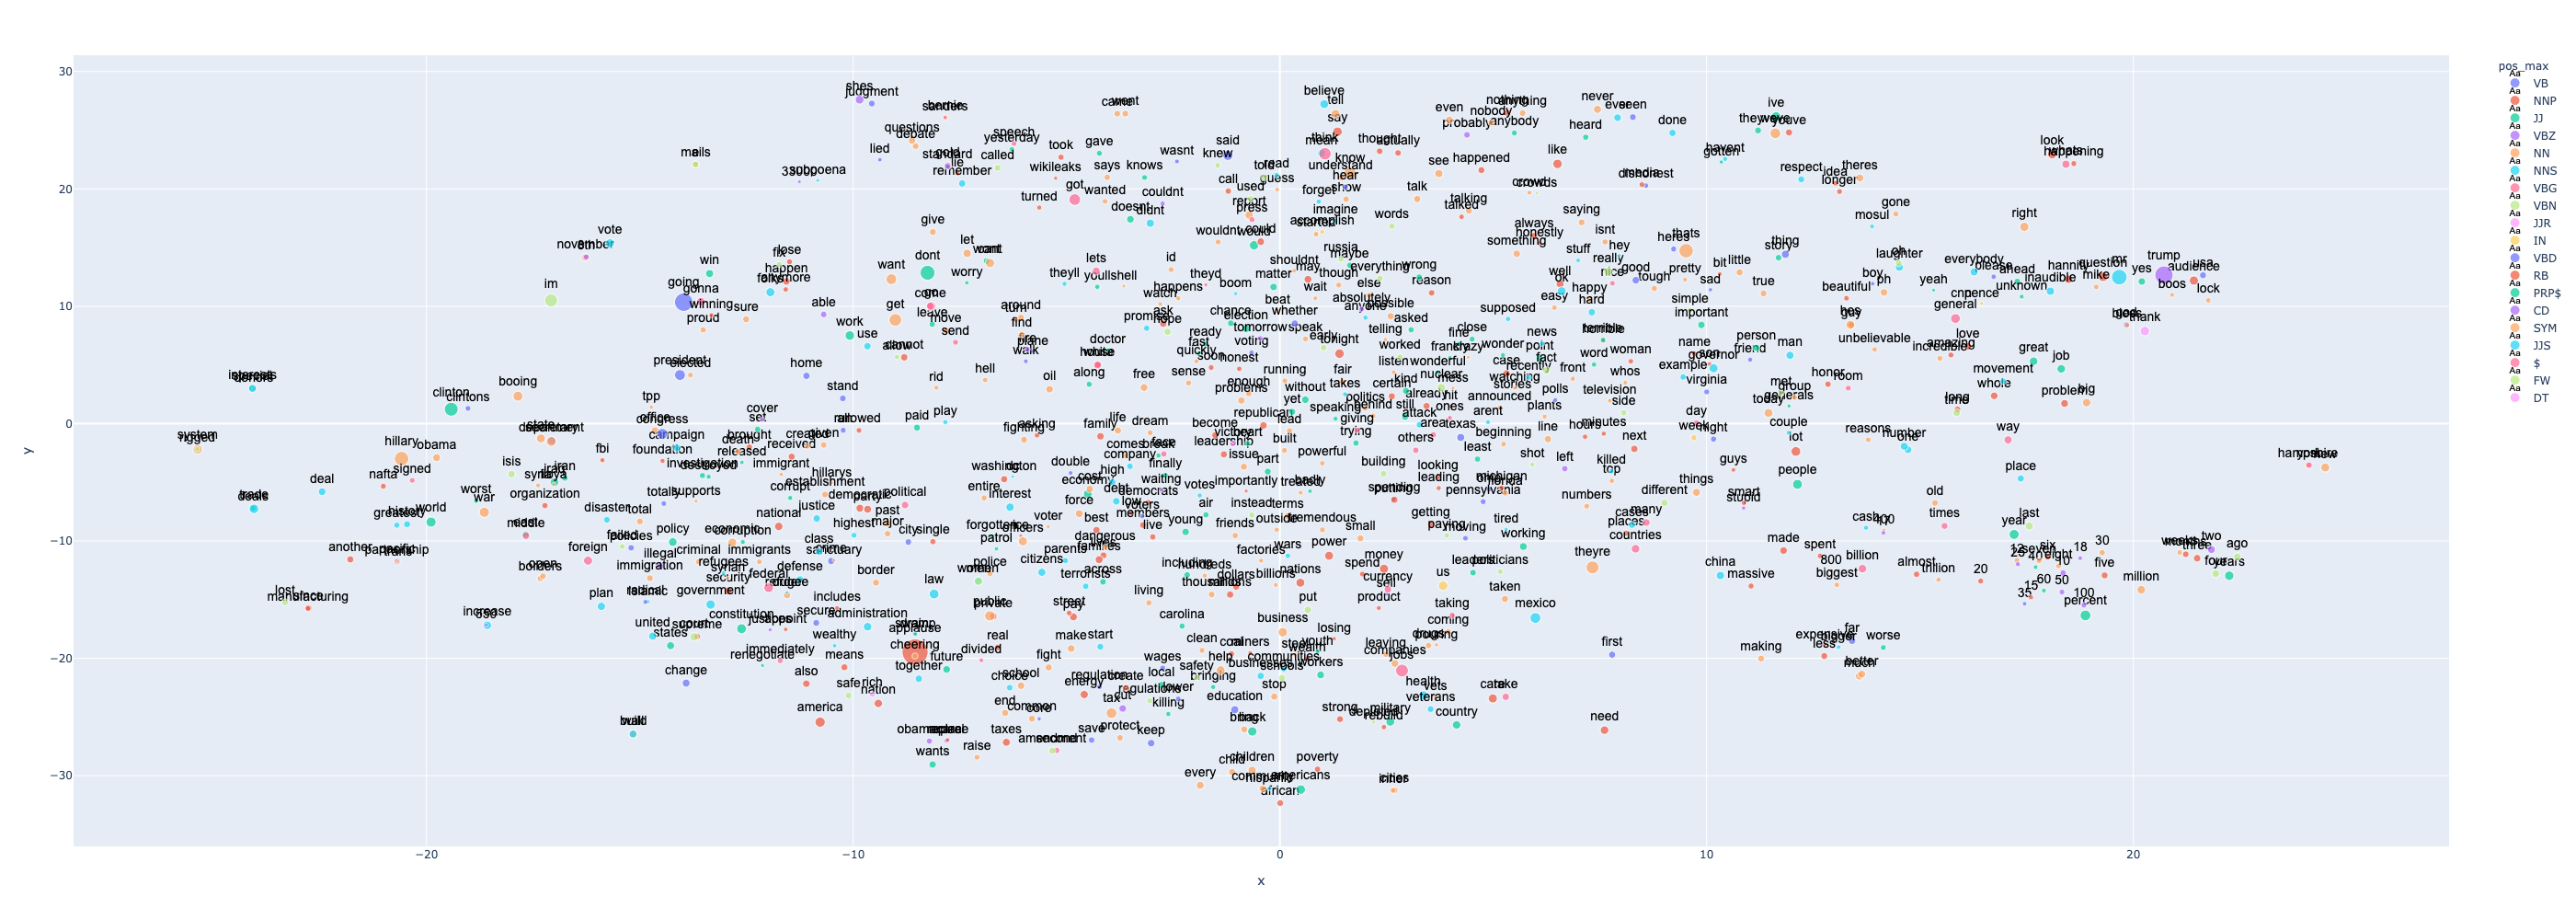

In [25]:
px.scatter(coords.reset_index(), 'x', 'y', 
           text='term_str', 
           color='pos_max', 
           hover_name='term_str',          
           size='tfidf_sum_speech_max',
           height=1000).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

## Semantic Algebra

### Analogies

$A : B :: C : D? \rightarrow B - A + C = D$


In [26]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [27]:
complete_analogy('man', 'boy', 'woman', 10)

term       sim
0          oh  0.882216
1         hey  0.860603
2        wait  0.757515
3    laughter  0.756390
4          id  0.743629
5        lets  0.727168
6         wow  0.721986
7  everything  0.709829
8       point  0.708802
9        boom  0.704170

In [28]:
complete_analogy('men', 'smart', 'women', 10)

term       sim
0  stupid  0.770357
1     too  0.751419
2   happy  0.739237
3   tough  0.735517
4    guys  0.693300
5  things  0.640595
6      so  0.635351
7   ready  0.634367
8    nice  0.617950
9   these  0.616368

In [29]:
complete_analogy('man', 'rich', 'woman', 10)

term       sim
0  finally  0.720521
1     vets  0.693674
2     once  0.690981
3    sense  0.688154
4    clean  0.677175
5     able  0.671056
6     core  0.670727
7  winning  0.667627
8     safe  0.663713
9   common  0.660989

In [30]:
complete_analogy('man', 'smart', 'woman', 10)

term       sim
0     arent  0.678410
1      boom  0.670713
2  whatever  0.669548
3     ready  0.669460
4     watch  0.659726
5      lets  0.658789
6     happy  0.644170
7      guys  0.641337
8    stupid  0.636282
9   looking  0.628326

### Similarites

In [31]:
get_most_similar('smart')

term       sim
0  stupid  0.795295
1   happy  0.743410
2     too  0.741987
3   tough  0.723994
4    guys  0.679519
5   ready  0.661695
6      so  0.651275
7  things  0.635600
8    nice  0.632622
9   arent  0.619722

In [32]:
get_most_similar('man')

term       sim
0       guy  0.815355
1       son  0.804930
2      name  0.794867
3    person  0.790844
4    friend  0.785880
5     pence  0.762158
6  endorsed  0.761243
7     honor  0.747426
8  governor  0.747087
9   general  0.711691

In [33]:
get_most_similar('woman')

term       sim
0      word  0.768296
1     night  0.713661
2     asked  0.706203
3       man  0.703138
4     front  0.703130
5       son  0.702275
6       boy  0.695305
7  endorsed  0.679221
8      case  0.666465
9      told  0.663932

In [34]:
get_most_similar(positive=['man'], negative=['woman'])

term       sim
0      under  0.456125
1  president  0.439283
2     become  0.429730
3        far  0.411029
4  important  0.383896
5       also  0.381610
6      honor  0.377355
7        god  0.372337
8        job  0.367909
9     nation  0.366466

In [35]:
get_most_similar(positive='woman')

term       sim
0      word  0.768296
1     night  0.713661
2     asked  0.706203
3       man  0.703138
4     front  0.703130
5       son  0.702275
6       boy  0.695305
7  endorsed  0.679221
8      case  0.666465
9      told  0.663932

In [36]:
get_most_similar(positive=['woman'], negative=['man'])

term       sim
0        back  0.604124
1        lets  0.588261
2       plane  0.572848
3    whatever  0.562412
4        away  0.562154
5        home  0.550951
6  everything  0.549779
7        fire  0.549416
8         let  0.535506
9        take  0.527174

## Save

In [37]:
#W2V = pd.DataFrame(model.wv.vectors_norm, index=model.wv.vocab.keys())
#W2V.to_csv('{}/{}-W2V.csv'.format(data_out, data_prefix))
#pd.Series(DOCS).to_csv('{}/{}-GENSIM_DOCS.csv'.format(data_out, data_prefix), index=False, header=False)

## View with HAC

In [38]:
proper_nouns = 'tommy emily tuppence agnes edmund holmes'.split()
coords2 = coords.loc[~coords.index.isin(proper_nouns), ['vector','stop','tfidf_sum_speech_max','pos_max']]

In [39]:
coords2

vector  stop  \
term_str                                                                
going         [-0.5896926, -0.033448573, -0.43854174, -0.735...     0   
applause      [0.44193777, 0.049275625, 0.043372754, 0.15265...     0   
people        [0.27612126, 0.01059554, -0.18202946, 0.131982...     0   
trump         [0.56707686, 0.21128759, 0.038926944, 0.306271...     0   
know          [-0.78603184, -0.3432822, 0.3448742, -0.579552...     0   
...                                                         ...   ...   
wonder        [-0.0062430734, -0.0516798, 0.10011333, -0.026...     0   
40            [0.014927592, 0.01133845, -0.005977894, -0.048...     0   
takes         [-0.020915646, -0.067841925, 0.040198173, -0.0...     0   
organization  [-0.18939391, -0.3501427, -0.23860739, -0.0808...     0   
hit           [-0.058892578, -0.020950804, 0.049488954, -0.0...     0   

              tfidf_sum_speech_max pos_max  
term_str                                    
going                  7828.914181      VB  
applause              15788.552536     NNP  
people                 2320.333401      JJ  
trump                  7756.258769     VBZ  
know                   3367.726805      NN  
...                            ...     ...  
wonder                  565.241628      JJ  
40                      526.878930      JJ  
takes                   595.251260     NNS  
organization            924.775302     NNP  
hit                     453.072329     NNP  

[727 rows x 4 columns]

In [40]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

def hca(sims, labels, linkage_method='ward', color_thresh=.3):
    tree = sch.linkage(sims, method=linkage_method)
    fig_height = len(labels) / 3
    plt.figure()
    fig, axes = plt.subplots(figsize=(10, fig_height))
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)

def plot_terms_tree(coords, terms_n = 100, term_pos_pat = r'^(N|V)', color_thresh=1):
    term_filter = coords.pos_max.str.match(term_pos_pat) & (coords.stop == 0) & (coords.index.str.len() > 2)
    M = coords[term_filter].sort_values('tfidf_sum_speech_max', ascending=False).vector.head(terms_n)
    IDX = coords.loc[M.index].index #term_str
    hca(M.to_list(), IDX.to_list(), color_thresh=color_thresh)

<Figure size 432x288 with 0 Axes>

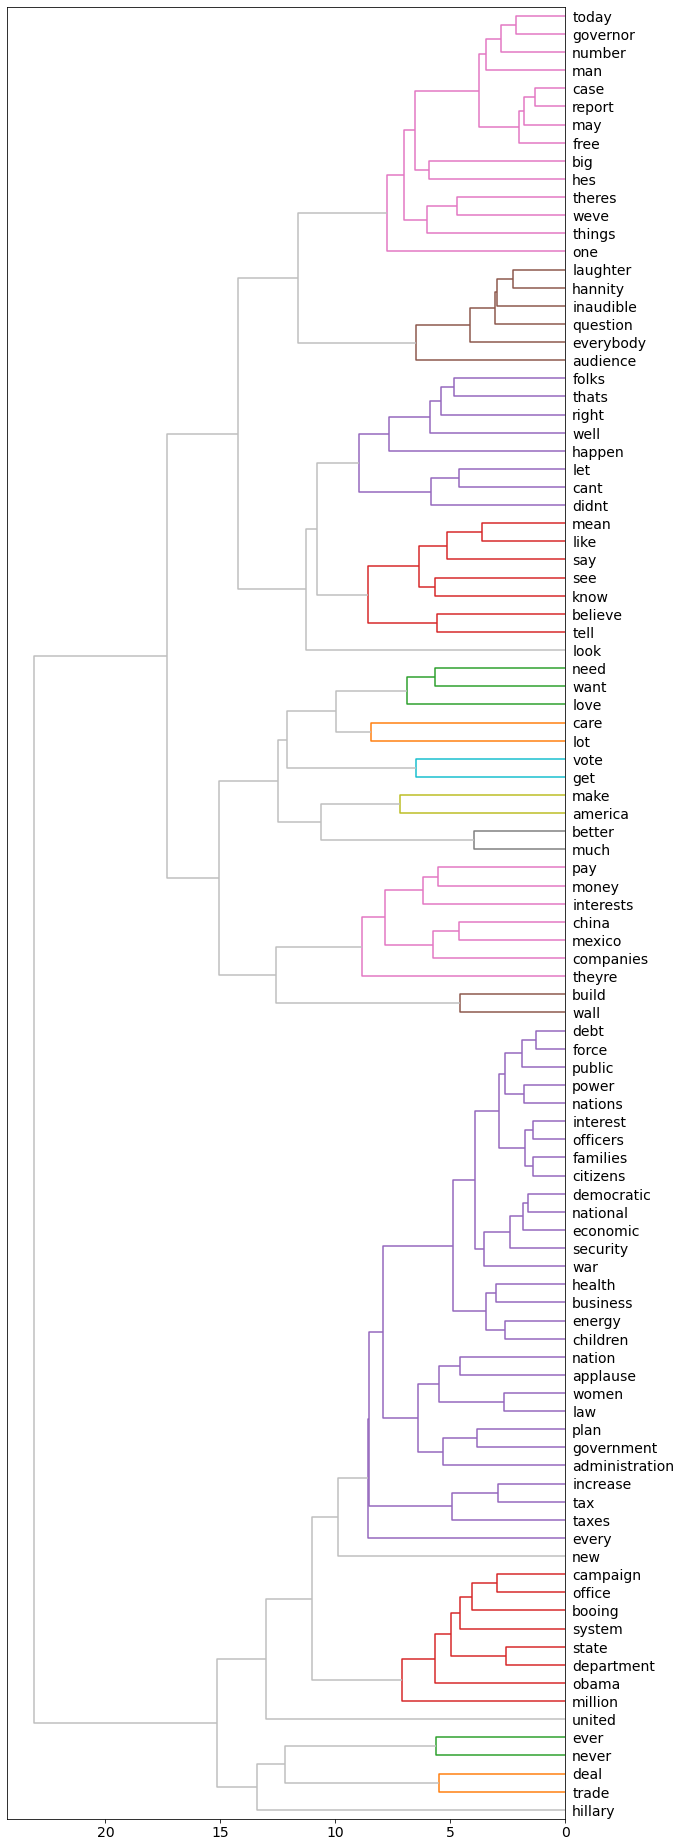

In [50]:
plot_terms_tree(coords2, term_pos_pat=r'^NN[^P]?', color_thresh=9, terms_n=100)

<Figure size 432x288 with 0 Axes>

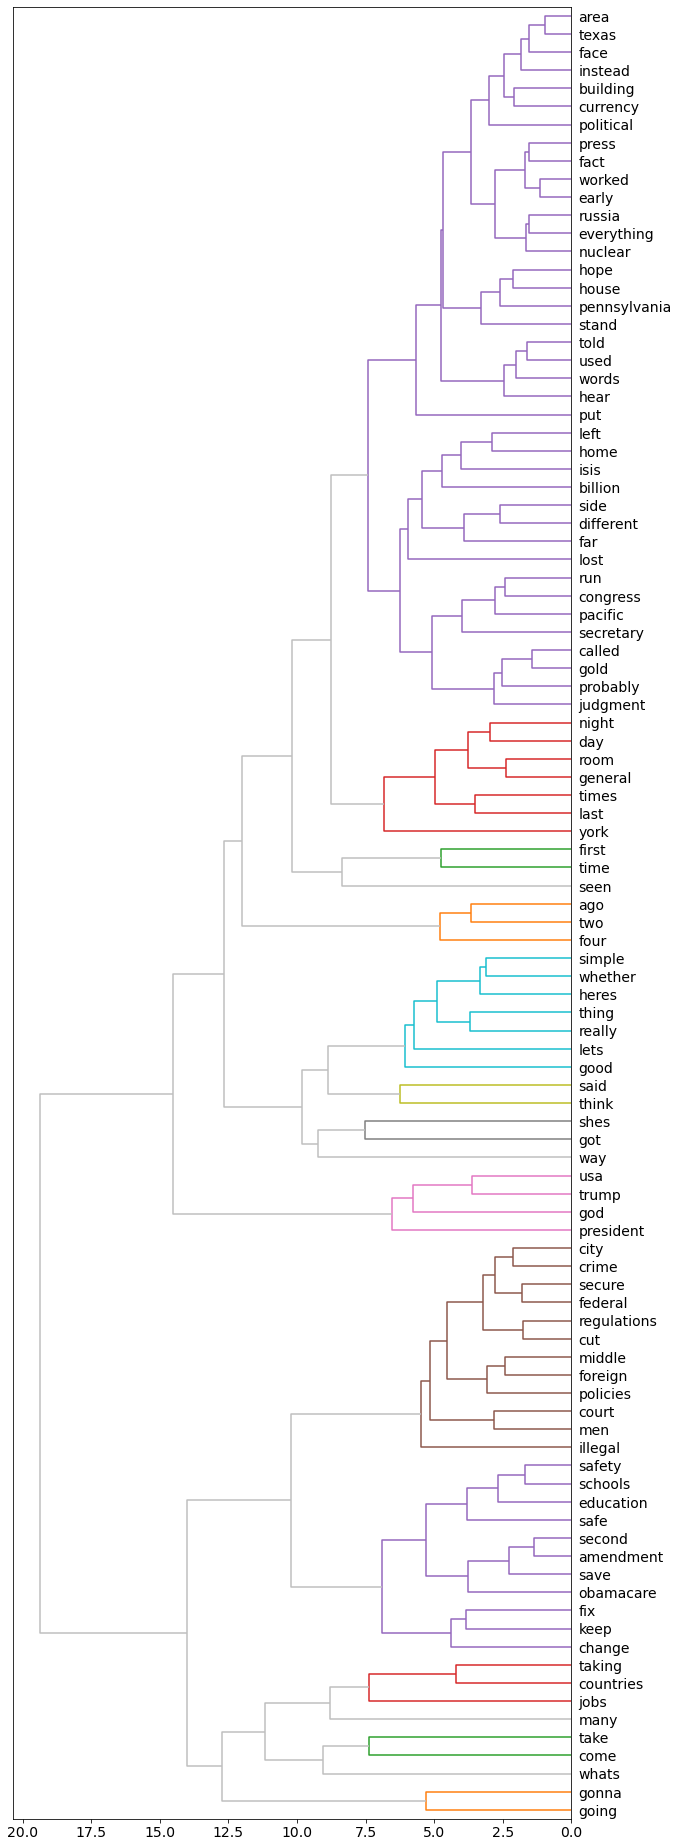

In [42]:
plot_terms_tree(coords2, term_pos_pat=r'^V', color_thresh=8, terms_n=100)

In [43]:
complete_analogy('us','great','china', 10)

term       sim
0         job  0.619503
1        such  0.612123
2    virginia  0.561640
3       built  0.557388
4    building  0.505253
5  tremendous  0.494249
6       honor  0.493945
7      plants  0.479162
8     florida  0.478918
9     leading  0.474528

In [44]:
complete_analogy('america', 'great', 'china', 20)

term       sim
0  tremendous  0.633187
1   different  0.598299
2        with  0.564863
3      plants  0.553351
4       where  0.551865
5     deficit  0.548309
6    horrible  0.542858
7   wonderful  0.534471
8      places  0.525664
9         800  0.516454

In [45]:
complete_analogy('man','job','woman', 10)

term       sim
0           hey  0.533347
1          good  0.526914
2          fair  0.520840
3     education  0.512752
4          look  0.502155
5  pennsylvania  0.499730
6       looking  0.496344
7          such  0.486214
8          whos  0.483544
9         gonna  0.481784

In [46]:
complete_analogy('us','great','mexico', 10)

term       sim
0      virginia  0.581010
1         built  0.555007
2           job  0.547920
3       leading  0.537802
4     beautiful  0.530589
5  pennsylvania  0.515632
6           air  0.515097
7       florida  0.507641
8            ph  0.496399
9         north  0.474773

In [47]:
complete_analogy('us','great','russia', 10)

term       sim
0    friend  0.701387
1      such  0.700261
2       guy  0.672476
3       boy  0.614454
4  actually  0.609756
5   thought  0.593176
6     group  0.591206
7    really  0.590119
8  honestly  0.584637
9       wow  0.568313

In [48]:
complete_analogy('woman', 'home', 'man', 10)

term       sim
0      open  0.679008
1  policies  0.666000
2    policy  0.620935
3  supports  0.601191
4   brought  0.594571
5  security  0.590075
6     death  0.582729
7     comes  0.580870
8   illegal  0.580672
9     crime  0.574494